## Custom scenarios using `premise`

#### Github repository: [https://github.com/premise-community-scenarios](https://github.com/premise-community-scenarios)
#### Documentation: [https://premise.readthedocs.io/en/latest/user_scenarios.html](https://premise.readthedocs.io/en/latest/user_scenarios.html)
#### Tutorial author: Romain Sacchi
#### Duration: 2 hours

`premise` accepts [`datapackages`](https://specs.frictionlessdata.io/data-package/) which contain enough information to build and implement a scenario.

Datapackages for `premise` essentially contain:
1. a datapackage.json file, describing the resources contained by the datapackage
2. an inventory file (optional), if `premise` needs to import some inventories not present in ecoinvent
3. a scenario data table, contianing variables and their values for each time step
4. a config-yaml file, telling `premise` how to interpret the variables contained in the scenario data table.

In this exercise, we will want to model a market for bread which will present varying shares for three bread recipes:

* Activated Dough Development
* Straight Dough Method
* Delayed Salt Method

The resulting datapackage [already exists](https://github.com/premise-community-scenarios/scenario-example-bread), let's have a look at it.

## datapackage.json

- It defines the datapackage
- Allows you to fill in metadata (author of the scenario, license, etc.)
- Defines resources (files) and where to find the,

## Scenario data

- Tabular data
- CSV format
- Variables: production volumes, efficiencies, etc.
- Timeseries

## config.yaml

- YAML file
- Gives instructions to premise on what to do.
- One can declare technologies/suppliers, modify their efficiency over time, create markets and substitute suppliers with new ones.

## Additional inventories

- Optional. If your cscenario reuires inventories not prensent in the premise database.

## Running custom scenario in `premise`

In theory, your datapackage is now defined, the necessary metadata is filled and the resources declared, and all the components are present for `premise` to interpret it.

Now, let's have a look at the content of these files, and when this is done, we can run it, like so:

In [32]:
from premise import *
from datapackage import Package
import bw2data as bw

In [3]:
urls = [
    "C:/Users/lucille.baucal-poyac/as23_buildings/autumn-school-bw2/ProspectiveScenarios/cas_shareMarketCement__us/datapackage.json",
]

In [4]:
bw.projects.set_current("default")

In [5]:
bw.databases

Databases dictionary with 4 object(s):
	biosphere3
	cutoff391
	ecoinvent-391-cutoff
	test

In [28]:
bw.projects.set_current("PUMA-custom_scenario_v23")

In [29]:
bw.databases

Databases dictionary with 0 objects

In [30]:
#ecoinvent
if 'cutoff391' in bw.databases:
    print("Database has already been imported.")
else:
    # mind that the ecoinvent file must be unzipped; then: path to the datasets subfolder
    fpei35cut = r"C:\Users\lucille.baucal-poyac\Desktop\Documents CETU\BDD environnementales\ecoinvent_cutoff_391\datasets"
    # the "r" makes sure that the path is read as a string - especially useful when you have spaces in your string
    ei35cut = bw.SingleOutputEcospold2Importer(fpei35cut, 'cutoff391')
    ei35cut
    ei35cut.apply_strategies()
    ei35cut.statistics()

AttributeError: module 'bw2data' has no attribute 'SingleOutputEcospold2Importer'

In [6]:
if "PUMA-custom_scenario" not in bw.projects:
    bw.projects.copy_project("PUMA-custom_scenario_v2")

In [7]:
bw.databases

Databases dictionary with 4 object(s):
	biosphere3
	cutoff391
	ecoinvent-391-cutoff
	test

# Define scenarios

In [8]:
if 'SSP2-Base 2020' in bw.databases:
    del bw.databases['SSP2-Base 2020']

In [9]:
bw.databases

Databases dictionary with 4 object(s):
	biosphere3
	cutoff391
	ecoinvent-391-cutoff
	test

In [10]:
scenarios_SSP = []
pathway_list = ["SSP2-Base","SSP2-RCP26"]
year_list = [2020,2025,2030,2035,2040,2045,2050]

for pathways in pathway_list:
    for years in year_list:
        scenarios_SSP.append({'model': 'image', 'pathway': pathways, 'year': years})
print(len(scenarios_SSP))
print(scenarios_SSP)

14
[{'model': 'image', 'pathway': 'SSP2-Base', 'year': 2020}, {'model': 'image', 'pathway': 'SSP2-Base', 'year': 2025}, {'model': 'image', 'pathway': 'SSP2-Base', 'year': 2030}, {'model': 'image', 'pathway': 'SSP2-Base', 'year': 2035}, {'model': 'image', 'pathway': 'SSP2-Base', 'year': 2040}, {'model': 'image', 'pathway': 'SSP2-Base', 'year': 2045}, {'model': 'image', 'pathway': 'SSP2-Base', 'year': 2050}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2020}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2025}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2030}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2035}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2040}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2045}, {'model': 'image', 'pathway': 'SSP2-RCP26', 'year': 2050}]


In [20]:
clear_cache()

Cache folder cleared!


In [21]:
ndb = NewDatabase(
        scenarios = [scenarios_SSP[0]],        
        source_db="cutoff391",
        source_version="3.9",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        external_scenarios=[Package(url) for url in urls]
)

premise v.(1, 7, 6)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

100%|█████████████████████████████████████████████████████████████████████████| 21238/21238 [00:00<00:00, 36593.21it/s]


Adding exchange data to activities


100%|████████████████████████████████████████████████████████████████████████| 674593/674593 [02:05<00:00, 5378.89it/s]


Filling out exchange data


100%|██████████████████████████████████████████████████████████████████████████| 21238/21238 [00:10<00:00, 2108.43it/s]


Set missing location of datasets to global scope.
Set missing location of production exchanges to scope of dataset.
Correct missing location of technosphere exchanges.
Correct missing flow categories for biosphere exchanges
Remove empty exchanges.
Remove uncertainty data.
Done!

////////////////// IMPORTING DEFAULT INVENTORIES ///////////////////
Cannot find cached inventories. Will create them now for next time...
Importing default inventories...

Extracted 1 worksheets in 0.74 seconds
Migrating to 3.8 first
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Remove uncertainty data.
Extracted 1 worksheets in 0.21 seconds
Migrating to 3.8 first
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Applying strategy: migrate_datase

In [25]:
ndb.update_external_scenario()


//////////////// IMPORTING USER-DEFINED INVENTORIES ////////////////
Extracted 1 worksheets in 0.01 seconds
List of unlinked exchanges:
+------------------------------------------------------------------+-------------------------------------------------------+-----------------------------+------------+----------------+--------------+--------------------+
|                               Name                               |                   Reference product                   |           Location          | Categories |      Unit      |     Type     |        File        |
+------------------------------------------------------------------+-------------------------------------------------------+-----------------------------+------------+----------------+--------------+--------------------+
|                   market for gypsum, mineral                     |                    gypsum, mineral                    |             RER             |    None    |   kilogram     | technosphere | 

In [23]:
from bw2data import __version__
__version__

(3, 6, 6)

In [26]:
ndb.write_db_to_brightway(["SSP2-Base 2020"])

Write new database(s) to Brightway2.


KeyError: 'product'

In [27]:
for ds in ndb.scenarios[0]["database"]:
    for e in ds["exchanges"]:
        if e["type"]!="biosphere":
            if "product" not in e:
                print(ds["name"], e)

cement production, CEM II/A-S {'name': 'market for cement factory ', 'amount': 5.36e-11, 'database': 'ecoinvent-3.9.1-cutoff ', 'location': 'GLO', 'unit': 'unit', 'type': 'technosphere', 'reference product': 'cement factory '}
cement production, CEM II/A-S {'name': 'clinker production ', 'amount': 0.8265, 'database': 'ecoinvent-3.9.1-cutoff ', 'location': 'Europe without Switzerland ', 'unit': 'kilogram', 'type': 'technosphere', 'reference product': 'clinker '}
cement production, CEM II/A-S {'name': 'market group for electricity, medium voltage ', 'amount': 0.0374, 'database': 'ecoinvent-3.9.1-cutoff ', 'location': 'Europe without Switzerland ', 'unit': 'kilowatt hour ', 'type': 'technosphere', 'reference product': 'electricity, medium voltage '}
cement production, CEM II/A-S {'name': 'market for ethylene glycol ', 'amount': 0.00021, 'database': 'ecoinvent-3.9.1-cutoff ', 'location': 'GLO', 'unit': 'kilogram', 'type': 'technosphere', 'reference product': 'ethylene glycol '}
cement prod

In [20]:
import bw2data, bw2calc
FU = [
    {act: 1} for db in [
        "cutoff391", "SSP2-Base 2020", "SSP2-RCP26 - 2020" 
    ] for act in bw2data.Database(db) if act["name"] == "market for transport, passenger car"
    and act["location"] == "RER"
]
FU

[{'market for transport, passenger car' (kilometer, RER, None): 1},
 {'market for transport, passenger car' (kilometer, RER, None): 1}]

In [21]:
method = [('IPCC 2021', 'climate change: fossil', 'global warming potential (GWP100)')]
bw2calc.multi_lca.calculation_setups["Concrete"] = {
    "inv": FU,
    "ia": method
}

In [22]:
lca = bw2calc.MultiLCA("Concrete")
acts = [list(d.keys())[0] for d in lca.func_units]

In [23]:
import pandas as pd
results = pd.DataFrame(
    zip(
        [a["name"] for a in acts],
        [a["database"] for a in acts],
        lca.results.flatten()
    ),
    columns=["name", "year", "GWP"]
)

In [24]:
results = results.replace("cutoff391", 2020)
results["year"] = results["year"].astype("str")

Text(0, 0.5, 'kg CO$_2$-eq./km')

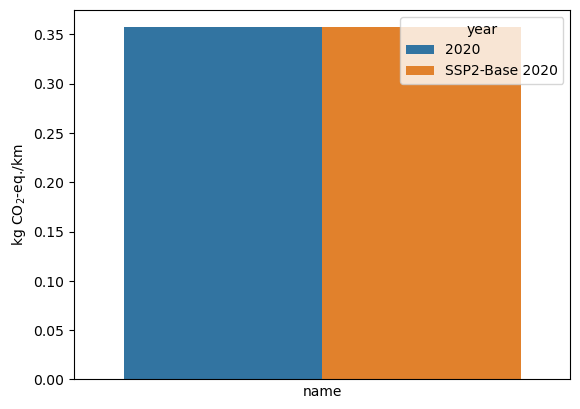

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot with seaborn barplot
sns.barplot(data=results, x='name', y='GWP', hue='year')

plt.xticks([])
plt.ylabel("kg CO$_2$-eq./km")